# Recurrent neural networks

# Task 1

Get IBM stock market data and evaluate prediction on a set of recurrent neural networks.

Dataset can be downloaded from https://www.kaggle.com/szrlee/stock-time-series-20050101-to-20171231



## Subtask 1

Load data and prepare the dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
df = pd.read_csv('/content/all_stocks_2006-01-01_to_2018-01-01.csv')

In [ ]:
df.head()

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,77.76,79.35,77.24,79.11,3117200,MMM
1,2006-01-04,79.49,79.49,78.25,78.71,2558000,MMM
2,2006-01-05,78.41,78.65,77.56,77.99,2529500,MMM
3,2006-01-06,78.64,78.90,77.64,78.63,2479500,MMM
4,2006-01-09,78.50,79.83,78.46,79.02,1845600,MMM


In [ ]:
df.Name.value_counts()

UTX      3020
VZ       3020
GS       3020
PFE      3020
AXP      3020
PG       3020
GE       3020
CAT      3020
TRV      3020
DIS      3020
WMT      3020
JNJ      3020
BA       3020
CVX      3020
MCD      3020
NKE      3020
KO       3020
UNH      3020
JPM      3020
HD       3020
MMM      3020
XOM      3020
IBM      3020
MSFT     3019
AMZN     3019
AAPL     3019
CSCO     3019
GOOGL    3019
AABA     3019
MRK      3019
INTC     3019
Name: Name, dtype: int64

In [ ]:
df.dtypes

Date       object
Open      float64
High      float64
Low       float64
Close     float64
Volume      int64
Name       object
dtype: object

In [ ]:
df1 = df.copy()

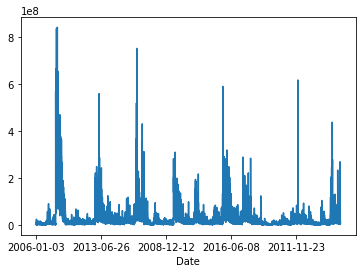

In [ ]:
# make sure the time column is actually time format
#df1['Date'] = pd.to_datetime(df1['Date'])

# set time as the index
df1.set_index('Date',inplace=True)

# plot
df1['Volume'].plot()

In [ ]:
stocks = df.Name.unique()
stocks

array(['MMM', 'AXP', 'AAPL', 'BA', 'CAT', 'CVX', 'CSCO', 'KO', 'DIS',
       'XOM', 'GE', 'GS', 'HD', 'IBM', 'INTC', 'JNJ', 'JPM', 'MCD', 'MRK',
       'MSFT', 'NKE', 'PFE', 'PG', 'TRV', 'UTX', 'UNH', 'VZ', 'WMT',
       'GOOGL', 'AMZN', 'AABA'], dtype=object)

In [ ]:
mmm = df1[df1['Name']=='MMM']
gs = df1[df1['Name']=='GS']

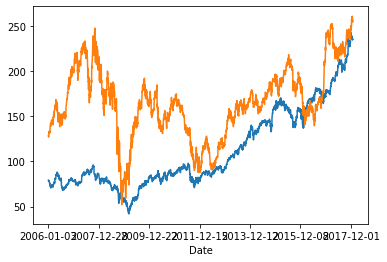

In [ ]:
mmm['Close'].plot()
gs['Close'].plot()

In [ ]:
df2 = df1.copy()
del df2['High']
del df2['Low']
del df2['Volume']
del df2['Open']

In [ ]:
df3 = df2.set_index([df2.index, 'Name'])['Close'].unstack()

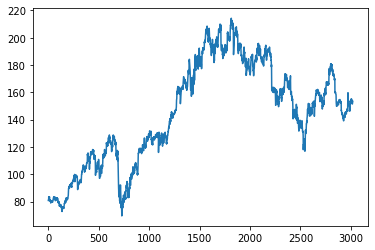

In [ ]:
Write your code here


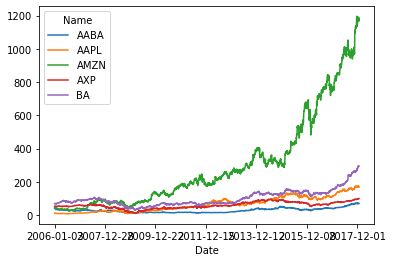

In [ ]:
df3.iloc[:,:5].plot()

In [ ]:
Write your code here

# Subtask 2

Perform prediction by using feed-forward neural network (sliding window)

In [ ]:
df1 = df.copy()

In [ ]:
df1[['Date']] = df1[['Date']].apply(pd.to_datetime)

In [ ]:
df1.set_index('Date',inplace=True)
df1.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,77.76,79.35,77.24,79.11,3117200,MMM
2006-01-04,79.49,79.49,78.25,78.71,2558000,MMM
2006-01-05,78.41,78.65,77.56,77.99,2529500,MMM
2006-01-06,78.64,78.90,77.64,78.63,2479500,MMM
2006-01-09,78.50,79.83,78.46,79.02,1845600,MMM


In [ ]:
df1.isnull().sum()

Open      25
High      10
Low       20
Close      0
Volume     0
Name       0
dtype: int64

In [ ]:
df1 = df1.dropna()

In [ ]:
df1.isnull().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
Name      0
dtype: int64

In [ ]:
df2 = df1.Close

In [ ]:
mmm = df1[df1['Name']=='MMM']

In [ ]:
IBM = df1[df1['Name']=='IBM']

In [ ]:
IBM

In [ ]:
mmm1 = mmm['Close']

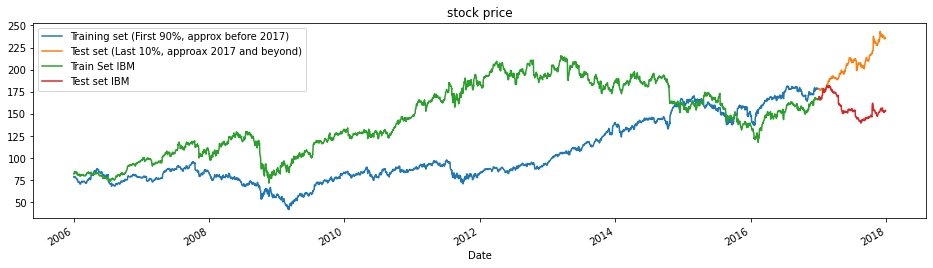

In [ ]:
mmm["Close"][:'2016'].plot(figsize=(16,4),legend=True)
mmm["Close"]['2017':].plot(figsize=(16,4),legend=True) # 10% is used for thraining data which is approx 2017 data
IBM["Close"][:'2016'].plot(figsize=(16,4),legend=True)
IBM["Close"]['2017':].plot(figsize=(16,4),legend=True)
plt.legend(['Training set (First 90%, approx before 2017)','Test set (Last 10%, approax 2017 and beyond)', 'Train Set IBM', 'Test set IBM'] )
plt.title('stock price')
plt.show()

In [ ]:
def load_data(datasetname, column, seq_len, normalise_window):
    # A support function to help prepare datasets for an RNN/LSTM/GRU
    data = datasetname.loc[:,column]

    sequence_length = seq_len + 1
    result = []
    for index in range(len(data) - sequence_length):
        result.append(data[index: index + sequence_length])
    
    if normalise_window:
        #result = sc.fit_transform(result)
        result = normalise_windows(result)

    result = np.array(result)

    #Last 10% is used for validation test, first 90% for training
    row = round(0.9 * result.shape[0])
    train = result[:int(row), :]
    np.random.shuffle(train)
    x_train = train[:, :-1]
    y_train = train[:, -1]
    x_test = result[int(row):, :-1]
    y_test = result[int(row):, -1]

    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))  

    return [x_train, y_train, x_test, y_test]

def normalise_windows(window_data):
    # A support function to normalize a dataset
    normalised_data = []
    for window in window_data:
        normalised_window = [((float(p) / float(window[0])) - 1) for p in window]
        normalised_data.append(normalised_window)
    return normalised_data

In [ ]:
train1, label_train, test1, label_test = load_data(IBM, 'Close', 20, True)

In [ ]:
train1.shape

(2698, 20, 1)

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(train1.shape[1],1)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"), 
    tf.keras.layers.Dense(1)
])
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 20)                0         
                                                                 
 dense_40 (Dense)            (None, 100)               2100      
                                                                 
 dropout_10 (Dropout)        (None, 100)               0         
                                                                 
 dense_41 (Dense)            (None, 20)                2020      
                                                                 
 dense_42 (Dense)            (None, 10)                210       
                                                                 
 dense_43 (Dense)            (None, 1)                 11        
                                                                 
Total params: 4,341
Trainable params: 4,341
Non-train

In [ ]:
model.compile(loss='mse',  metrics=['accuracy'], optimizer=tf.keras.optimizers.SGD(learning_rate=0.3, momentum=0.9))
his = model.fit(train1, label_train, batch_size=512, epochs=50, validation_data = (test1, label_test))

Epoch 1/50
6/6 [==============================] - 1s 32ms/step - loss: 0.0025 - accuracy: 0.0000e+00 - val_loss: 4.7062e-04 - val_accuracy: 0.0000e+00
Epoch 2/50
6/6 [==============================] - 0s 8ms/step - loss: 0.0011 - accuracy: 0.0000e+00 - val_loss: 5.3158e-04 - val_accuracy: 0.0000e+00
Epoch 3/50
6/6 [==============================] - 0s 7ms/step - loss: 8.5912e-04 - accuracy: 0.0000e+00 - val_loss: 5.2903e-04 - val_accuracy: 0.0000e+00
Epoch 4/50
6/6 [==============================] - 0s 11ms/step - loss: 7.4126e-04 - accuracy: 0.0000e+00 - val_loss: 3.0529e-04 - val_accuracy: 0.0000e+00
Epoch 5/50
6/6 [==============================] - 0s 7ms/step - loss: 6.0666e-04 - accuracy: 0.0000e+00 - val_loss: 2.1735e-04 - val_accuracy: 0.0000e+00
Epoch 6/50
6/6 [==============================] - 0s 7ms/step - loss: 5.4385e-04 - accuracy: 0.0000e+00 - val_loss: 1.9970e-04 - val_accuracy: 0.0000e+00
Epoch 7/50
6/6 [==============================] - 0s 7ms/step - loss: 5.3617e-04 -

In [ ]:
predicted_IBM = model.predict(test1)

In [ ]:
predicted_IBM.shape

(300, 1)

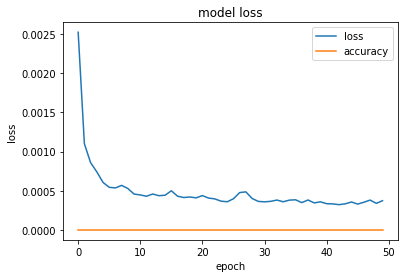

In [ ]:
plt.plot(his.history['loss'])
plt.plot(his.history['accuracy'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss','accuracy'])
plt.show()

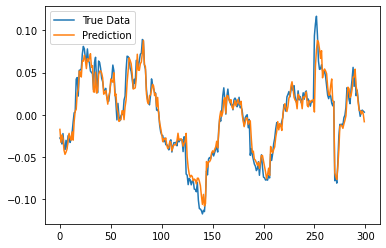

In [ ]:
fig = plt.figure(facecolor='white') 
ax = fig.add_subplot(111) 
ax.plot(label_test, label='True Data') 
plt.plot(predicted_IBM, label='Prediction') 
plt.legend() 
plt.show() 

## Subtask 3

Perform prediction by using RNN

In [ ]:
model_rnn = tf.keras.models.Sequential([
    tf.keras.layers.SimpleRNN(40, input_shape=(train1.shape[1],1), return_sequences=True), 
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.SimpleRNN(20),
    tf.keras.layers.Dense(1)
])
model_rnn.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_4 (SimpleRNN)    (None, 20, 40)            1680      
                                                                 
 dropout_6 (Dropout)         (None, 20, 40)            0         
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, 20)                1220      
                                                                 
 dense_23 (Dense)            (None, 1)                 21        
                                                                 
Total params: 2,921
Trainable params: 2,921
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_rnn.compile(loss='mse',  metrics=['accuracy'], optimizer='adam')
his1 = model_rnn.fit(train1, label_train, batch_size=512, epochs=50, validation_data = (test1, label_test))

Epoch 1/50
6/6 [==============================] - 2s 97ms/step - loss: 0.0095 - accuracy: 0.0000e+00 - val_loss: 0.0015 - val_accuracy: 0.0000e+00
Epoch 2/50
6/6 [==============================] - 0s 33ms/step - loss: 0.0035 - accuracy: 0.0000e+00 - val_loss: 6.0952e-04 - val_accuracy: 0.0000e+00
Epoch 3/50
6/6 [==============================] - 0s 32ms/step - loss: 0.0019 - accuracy: 0.0000e+00 - val_loss: 5.2670e-04 - val_accuracy: 0.0000e+00
Epoch 4/50
6/6 [==============================] - 0s 34ms/step - loss: 0.0015 - accuracy: 0.0000e+00 - val_loss: 3.8072e-04 - val_accuracy: 0.0000e+00
Epoch 5/50
6/6 [==============================] - 0s 33ms/step - loss: 0.0011 - accuracy: 0.0000e+00 - val_loss: 2.8337e-04 - val_accuracy: 0.0000e+00
Epoch 6/50
6/6 [==============================] - 0s 34ms/step - loss: 8.8166e-04 - accuracy: 0.0000e+00 - val_loss: 2.6678e-04 - val_accuracy: 0.0000e+00
Epoch 7/50
6/6 [==============================] - 0s 31ms/step - loss: 8.0927e-04 - accuracy: 

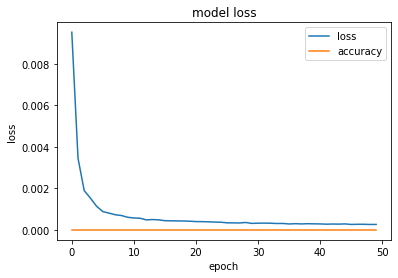

In [ ]:
plt.plot(his1.history['loss'])
plt.plot(his1.history['accuracy'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss','accuracy'])
plt.show()

In [ ]:
rnn_IBM = model_rnn.predict(test1)

In [ ]:
rnn_IBM.shape

(300, 1)

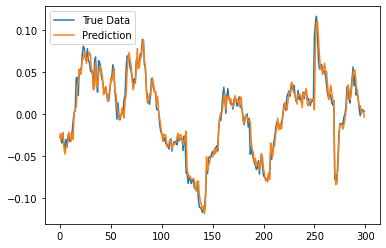

In [ ]:
fig = plt.figure(facecolor='white') 
ax = fig.add_subplot(111) 
ax.plot(label_test, label='True Data') 
plt.plot(rnn_IBM, label='Prediction') 
plt.legend() 
plt.show() 

## Subtask 4

Perform prediction by using LSTM

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, UpSampling2D
from tensorflow.keras.layers import Flatten, LSTM, Dropout

In [ ]:
model_lstm = Sequential()
model_lstm.add(LSTM(50, return_sequences=True, input_shape=(train1.shape[1],1)))
model_lstm.add(Dropout(0.2))
model_lstm.add(LSTM(25, return_sequences=False))
model_lstm.add(Dropout(0.2))
model_lstm.add(Dense(1, activation = "linear"))

model_lstm.compile(loss='mse', metrics=['accuracy'], optimizer='adam')

In [ ]:
hist1 = model_lstm.fit(train1, label_train, batch_size=512, epochs=50, validation_data = (test1, label_test))

Epoch 1/50
6/6 [==============================] - 5s 248ms/step - loss: 0.0036 - accuracy: 0.0000e+00 - val_loss: 0.0019 - val_accuracy: 0.0000e+00
Epoch 2/50
6/6 [==============================] - 1s 92ms/step - loss: 0.0024 - accuracy: 0.0000e+00 - val_loss: 0.0013 - val_accuracy: 0.0000e+00
Epoch 3/50
6/6 [==============================] - 1s 91ms/step - loss: 0.0015 - accuracy: 0.0000e+00 - val_loss: 6.8677e-04 - val_accuracy: 0.0000e+00
Epoch 4/50
6/6 [==============================] - 1s 89ms/step - loss: 9.9339e-04 - accuracy: 0.0000e+00 - val_loss: 5.3215e-04 - val_accuracy: 0.0000e+00
Epoch 5/50
6/6 [==============================] - 1s 90ms/step - loss: 0.0010 - accuracy: 0.0000e+00 - val_loss: 4.7827e-04 - val_accuracy: 0.0000e+00
Epoch 6/50
6/6 [==============================] - 1s 90ms/step - loss: 8.6152e-04 - accuracy: 0.0000e+00 - val_loss: 5.1630e-04 - val_accuracy: 0.0000e+00
Epoch 7/50
6/6 [==============================] - 1s 99ms/step - loss: 8.4391e-04 - accuracy:

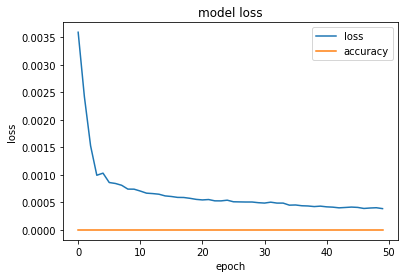

In [ ]:
plt.plot(hist1.history['loss'])
plt.plot(hist1.history['accuracy'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss','accuracy'])
plt.show()

In [ ]:
lstm_IBM = model_lstm.predict(test1)

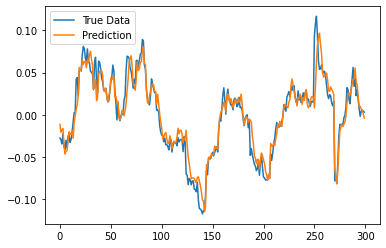

In [ ]:
fig = plt.figure(facecolor='white') 
ax = fig.add_subplot(111) 
ax.plot(label_test, label='True Data') 
plt.plot(lstm_IBM, label='Prediction') 
plt.legend() 
plt.show() 

## Subtask 5

Compare all above results by using MSE error and dermine the best architecture. You can do tests on more stock data than IBM.

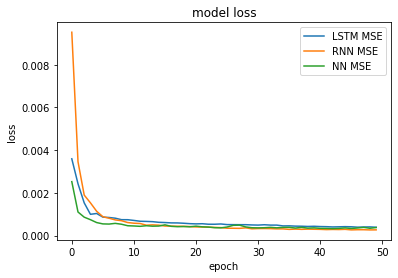

In [ ]:
plt.plot(hist1.history['loss'], label='LSTM MSE')
plt.plot(his1.history['loss'], label='RNN MSE')
plt.plot(his.history['loss'], label='NN MSE')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()